# Đồ án cuối kỳ trực quan hóa dữ liệu

**Danh sách thành viên**  
- 18120356 - Phan Anh Hào
- 18120363 - Đặng Văn Hiển
- 18120381 - Phạm Việt Hoa
- 18120397 - Nguyễn Đặng Hồng Huy
- 18120413 - Đỗ Liên Khoa  
  
**Bài toán**: sử dụng công cụ trực quan hóa dữ liệu để phân tích dữ liệu, các nhóm có thể chọn các chủ đề liên quan kinh tế, xã hội, khoa học kỹ thuật.  
**Ngữ cảnh bài toán**: bài toán phải mang liên quan đến Việt Nam  
**Dữ liệu của bài toán**: dữ liệu phải liên quan đến Việt Nam và phải được lấy từ nguồn có kiểm chứng điểm  
- Ít nhất phải có 5 biến
- Ít nhất phải có 100 quan sát

## Bối cảnh

Trong bối cảnh hiện này khi mà mọi thứ xung quanh ta đang được khai thác biến đổi lưu trữ dưới dạng dữ liệu với những mục đích khác nhau thì trong đồ án này nhóm em quyết định chọn dữ liệu thời tiết Việt Nam (cụ thể ở đây là Thành Phố Hồ Chí Minh).

## Mục tiêu

Mục tiêu của nhóm em trong đồ án này là có phân tích, trực quan hóa lên được những yếu tố có trong thời tiết cũng như biết thêm nhiều khía cạnh trong dữ liệu.

## Dữ liệu

Dữ liệu được thu thập từ api metaweather

Ý nghĩa của các thuộc tính  
  
**id** : id của dự đoán.

**created** : ngày dự đoán được tạo ra.

**applicable_date** : ngày được dự đoán.

**weather_state_name** : trạng thái của thời tiết.

**weather_state_abbr** : trạng thái của thời tiết viết tắt.

**wind_speed** : tốc độ gió (mph)

**wind_direction** : hướng gió (degrees)

**wind_direction_compass** : hướng gió trên la bàn.

**min_temp** : nhiệt độ tối thiểu (centigrade)

**max_temp** : nhiệt độ tối đa (centigrade)

**the_temp** : nhiệt độ (centigrade)

**air_pressure** : áp suât (mbar)

**humidity** : độ ẩm (percentage)

**visibility** : tấm nhìn (Miles)

**predictability** : độ thống nhất của các nhà dự báo (percentage)

# Tiền xử lý dữ liệu

In [2]:
import pandas as pd
import missingno as msno

### Đọc dữ liệu

In [6]:
pathfile = 'weather.csv'

df = pd.read_csv(pathfile, index_col="id")

df.head()

,weather_state_name,weather_state_abbr,wind_direction_compass,created,applicable_date,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
id,,,,,,,,,,,,,,
4815613784489984,Clear,c,NNE,2016-01-01T15:50:46.783160Z,2016-01-01,22.5975,33.8400,32.39,5.850634,24.918324,1015.0,57.0,11.968541,68
5117614409908224,Light Cloud,lc,ESE,2016-01-02T15:50:46.519900Z,2016-01-02,24.2150,33.9675,32.26,4.975470,111.222444,1014.0,61.0,11.687371,70
5845769609281536,Light Rain,lr,NE,2016-01-03T15:50:46.178120Z,2016-01-03,24.6425,33.0950,32.36,5.751001,54.357487,1014.0,66.0,9.814558,75
4887679040749568,Heavy Cloud,hc,ESE,2016-01-04T15:50:46.861790Z,2016-01-04,24.6750,33.3150,32.92,8.274074,105.343582,1014.0,63.0,11.006659,71
6722346127720448,Light Cloud,lc,E,2016-01-05T15:50:46.201860Z,2016-01-05,24.3425,33.3975,33.14,8.083090,93.195824,1013.0,63.0,11.890248,70


### Thống kê mô tả

In [4]:
df.shape

(1827, 14)

Dữ liệu của chúng ta có 14 biến và 1827 dòng.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 4815613784489984 to 4967109512658944
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weather_state_name      1827 non-null   object 
 1   weather_state_abbr      1827 non-null   object 
 2   wind_direction_compass  1827 non-null   object 
 3   created                 1827 non-null   object 
 4   applicable_date         1827 non-null   object 
 5   min_temp                1827 non-null   float64
 6   max_temp                1827 non-null   float64
 7   the_temp                1827 non-null   float64
 8   wind_speed              1827 non-null   float64
 9   wind_direction          1827 non-null   float64
 10  air_pressure            1827 non-null   float64
 11  humidity                1825 non-null   float64
 12  visibility              1823 non-null   float64
 13  predictability          1827 non-null   int64  
dtypes: float64(8)

Thống kê trên cho chúng ta thấy dữ liệu khá đẹp, hầu như tất cả các biến đều không bị trống dữ liệu, chỉ có biến humidity là null ở 2 dòng và biến visibility là null ở 4 dòng.

Về mặt kiểu dữ liệu, ta thấy các biến đều đã ở đúng kiểu dữ liệu phù hợp cho quá trình tính toán, trực quan cũng như phân tích. Chúng ta chỉ cần chuyển kiểu dữ liệu của biến applicable_data từ object sang Datetime để thuận tiên hơn khi muốn biểu diễn biểu đồ theo time series.

In [6]:
df.describe()

,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1825.000000,1823.000000,1827.000000
mean,25.019931,31.226111,30.172261,5.393093,170.734658,1011.942617,72.873425,10.104501,74.060208
std,1.401355,2.198493,2.091683,2.222613,79.464804,3.695833,10.678304,2.663590,2.782099
min,19.472500,12.930000,23.470000,1.247753,1.943751,996.445000,44.000000,2.173556,68.000000
25%,24.191250,29.862500,28.767500,3.662092,111.052687,1009.705000,65.000000,8.137477,71.000000
50%,24.997500,31.020000,29.955000,4.983774,156.168689,1012.480000,74.000000,10.352665,75.000000
75%,25.884167,32.398000,31.302500,6.805994,237.896587,1014.430000,81.000000,12.002251,77.000000
max,30.110000,38.035000,37.180000,13.850926,359.171590,1020.980000,96.000000,18.473366,80.000000


Trên đây là một số thống kê về số lượng, giá trị trung bình, ...

### Tiền xử lý dữ liệu

#### Dữ liệu bị mất

<AxesSubplot:>

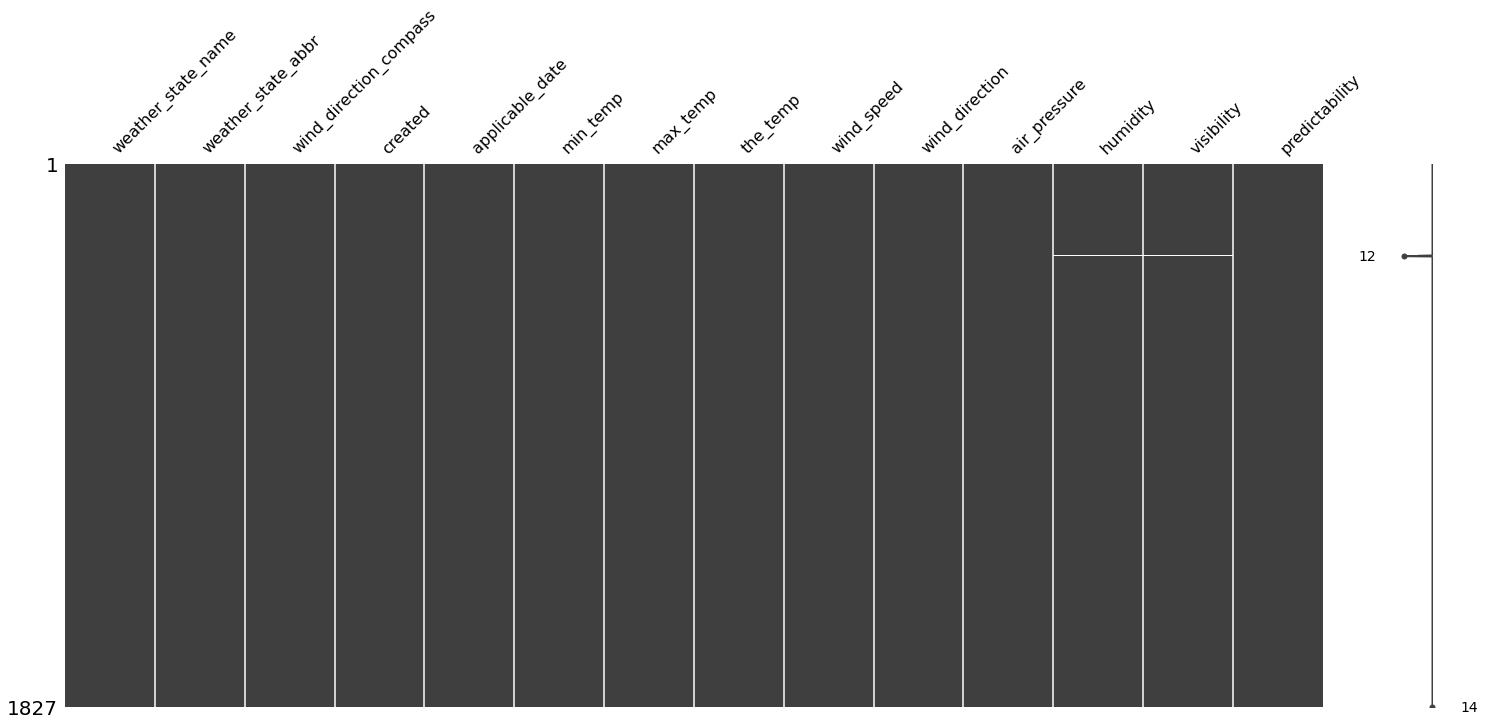

In [7]:
msno.matrix(df)

Chúng ta thấy các biến gần như đầy đủ nên chúng ta sẽ drop thẳng những dòng nào không đầy đủ giá trị.

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1823, 14)

Sau khi drop chúng ta còn lại 1823 dòng, vậy là chúng ta chỉ drop 4 dòng thôi, một số lượng không hề đáng kể như đã dự đoán.

### Dữ liệu bị trung lặp

In [10]:
df.duplicated().sum()

0

Không có dữ liệu nào bị trừng lặp.

### Chuyển kiểu dữ liệu biến applicable_date qua Datetime

In [12]:
df["applicable_date"] = pd.to_datetime(df["applicable_date"])

In [13]:
df["created"] = pd.to_datetime(df["created"])

In [14]:
df["applicable_date"].dtype

dtype('<M8[ns]')

In [15]:
df["created"].dtype

datetime64[ns, UTC]

### Export dữ liệu

Chúng ta sẽ export dữ liệu sau khi tiền sử lý ra để import vào trong Tableau trực quan hóa.

In [17]:
df.to_csv('weather_after_preprocess.csv')

# Trực quan hóa và phân tích dữ liệu

## Số lượng của từng loại thời tiết

![Count.png](https://drive.google.com/uc?export=view&id=1SSHWuq_TlX-5JtGfli28CnRpVcrtOX79)

Nhìn vào biểu đồ trên ta có thể thấy thời tiết mưa (Heavy Rain, Light Rain) chiếm số lượng khá nhiều.  
Thời tiết sấm chớp (Thunder) chiếm số lượng ít nhất trong thời tiết tại Việt Nam (cụ thể là Thành Phố Hồ Chí Minh) trong khoảng thời gian từ 2016 đến 2021.

## Nhiệt đồ theo thời gian

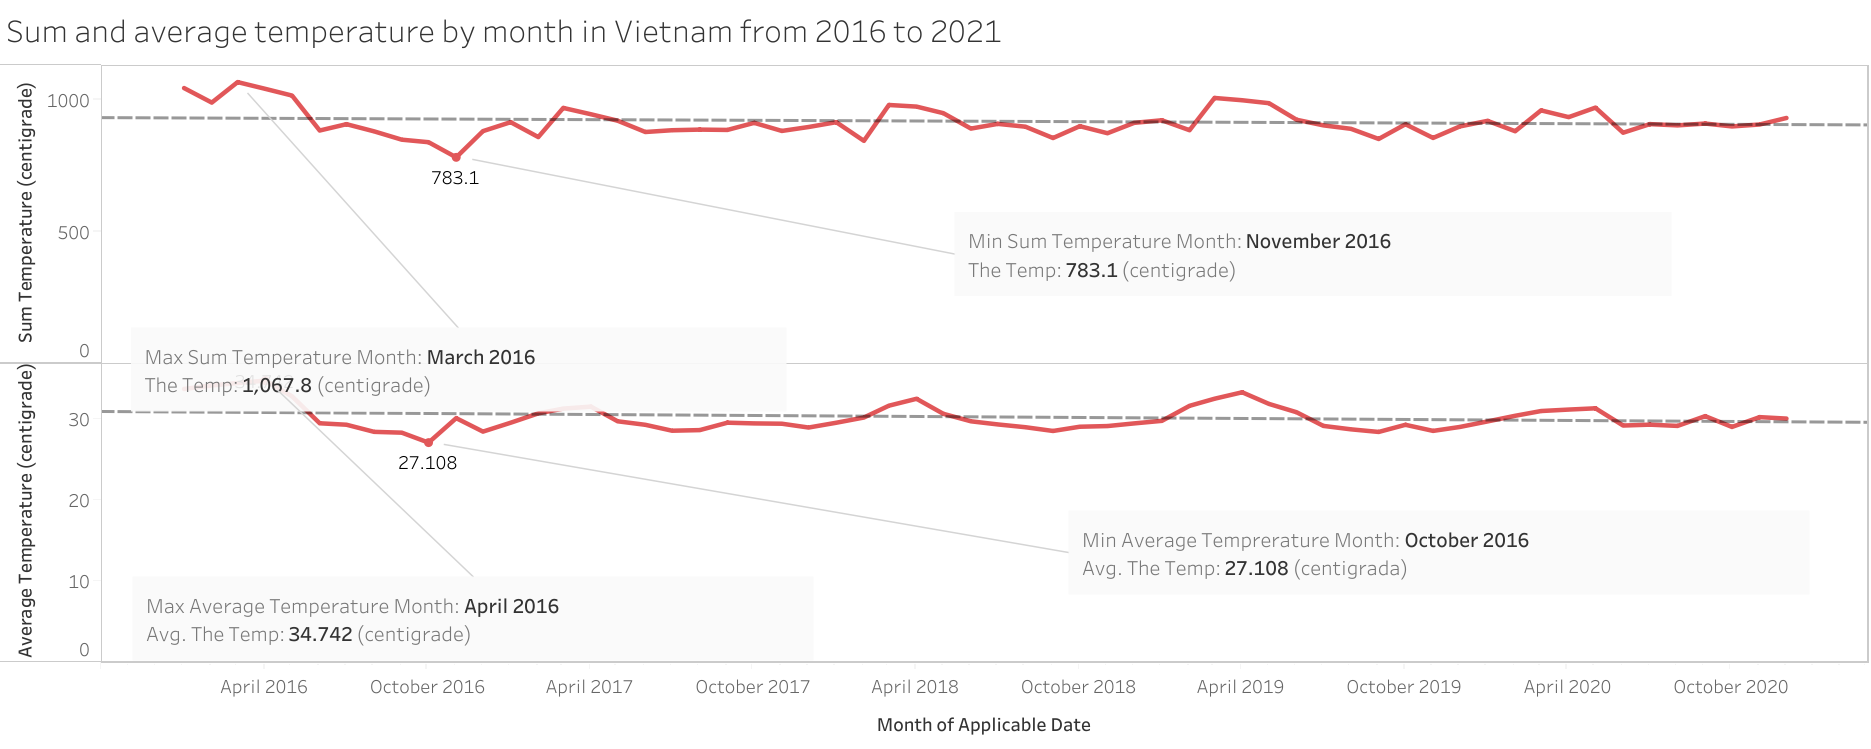

Biểu đồ trên cho thấy tổng lượng nhiệt tích lũy trên tháng (phần trên của biểu đồ) và nhiệt độ trung bình trong trên tháng (phần dưới của biểu đồ) theo thời gian từ năm 2016 đến năm 2021.

Tổng lượng nhiệt độ trong tháng:
* Xét về xu hướng, chúng ta thấy biểu đồ có xu hướng tăng (đường đứt nét màu xám) nhưng độ tăng là rất nhẹ, không đáng kể.
* Xét về quy luật, chúng ta không không thấy được một quy luật nào quá rõ ràng.
* Tổng lượng nhiệt cao nhất từ năm 2016 đến 2021 là 1067.8 độ C vào tháng 3 năm 2016.
* Tổng lượng nhiệt thấp nhất từ năm 2016 đến 2021 là 783.1 độ C vào tháng 11 năm 2016.

Nhiệt độ trung bình trong tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là đi ngang ổn định.
* Xét về quy luật, chúng ta cũng không thấy được một quy luật rõ ràng nào.
* Nhiệt độ trung bình cao nhất từ năm 2016 đến 2021 là 34.742 độ C vào tháng tư năm 2016.
* Nhiệt độ trung bình thấp nhất từ năm 2016 đến 2021 là 27.108 độ C vào tháng mười năm 2016.

## Ấp suất theo thời gian

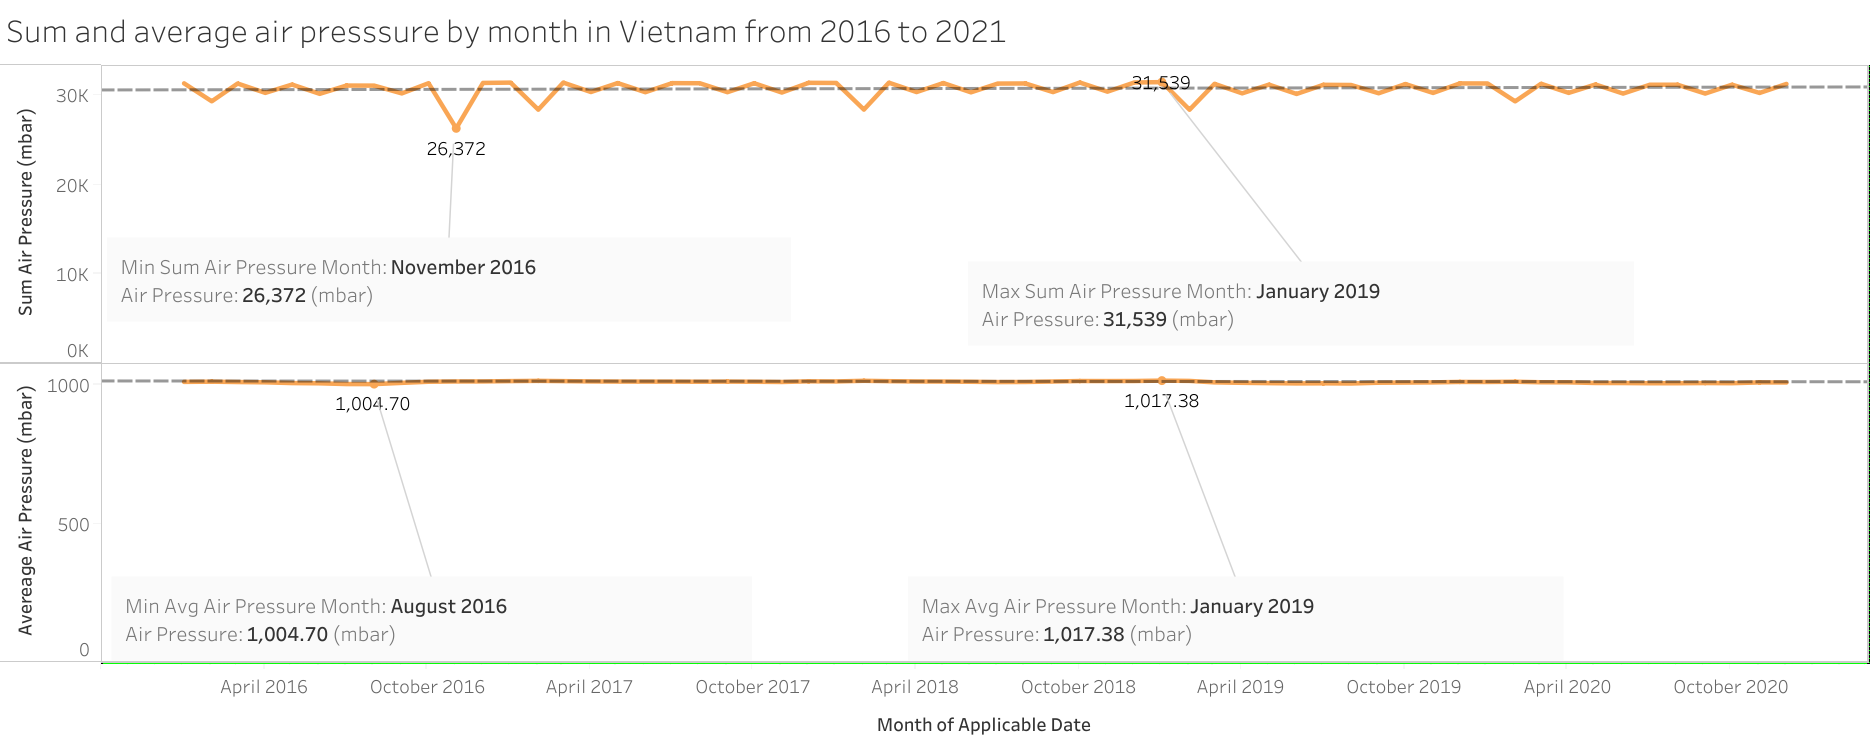

Biểu đồ trên cho thấy tổng lượng áp suất tích lũy trên tháng (phần trên của biểu đồ) và áp suất trung bình trong trên tháng (phần dưới của biểu đồ) theo thời gian từ năm 2016 đến năm 2021.

Tổng lượng áp suất trong tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là đi ngang ổn định.
* Xét về quy luật, chúng ta không không thấy được một quy luật nào quá rõ ràng.
* Tổng lượng áp suất cao nhất từ năm 2016 đến 2021 là 26372 mbar vào tháng 11 năm 2016.
* Tổng lượng áp suất thấp nhất từ năm 2016 đến 2021 là 31539 mbar vào tháng 1 năm 2019.

Áp suất trung bình trong tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là đi ngang ổn định.
* Xét về quy luật, chúng ta thấy đường áp suất trung bình đi ngang vào các tháng.
* Áp suất trung bình cao nhất từ năm 2016 đến 2021 là 1004.7 mbar vào tháng 8 năm 2016.
* Áp suất trung bình thấp nhất từ năm 2016 đến 2021 là 1017.38 mbar vào tháng 1 năm 2019.

## Độ ẩm theo thời gian

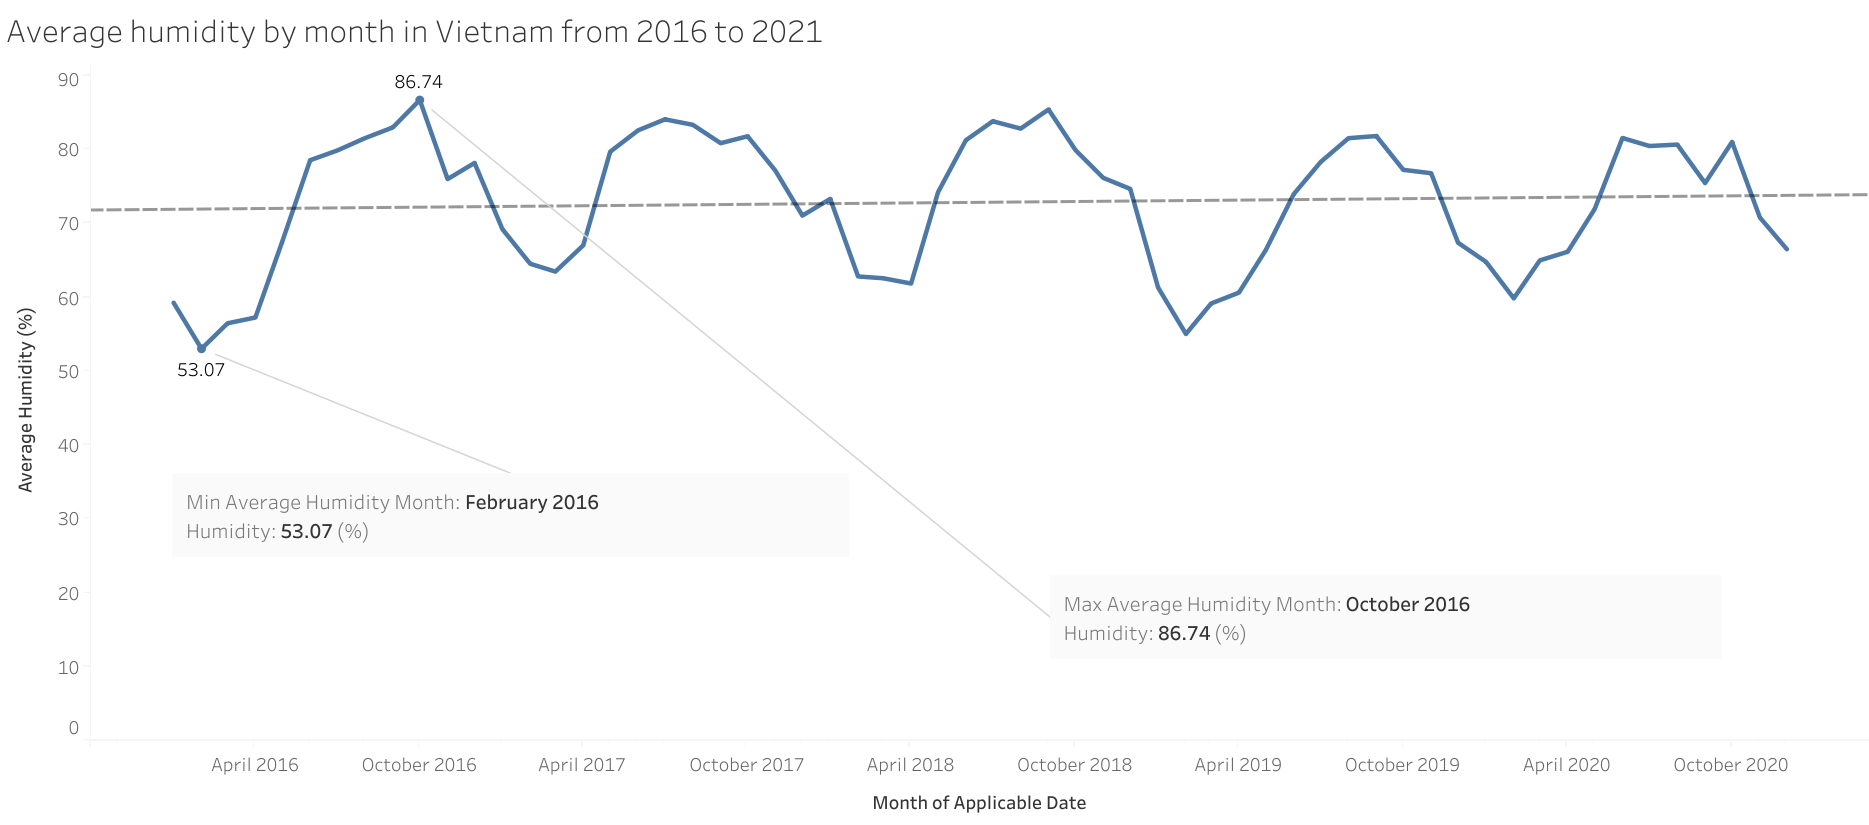

Biểu đồ trên cho chúng ta thấy độ ẩm trung bình theo tháng từ năm 2016 đến 2021.
* Xét về xu hướng, chung ta thấy độ ẩm trung bình có xu hương tăng từ 2016 đến 2021.
* Xét về quy luật, chúng ta thấy có quy luật một núi với chu kỳ thời gian lặp lại từ khoảng tháng tư năm này đến khoảng thánh tư năm sau với đỉnh nằm đâu đó khoảng từ tháng 6 đến tháng 8.
* Độ ẩm trung bình cao nhất từ năm 2016 đến 2021 là 86.74 % vào tháng 10 năm 2016.
* Độ ẩm trung bình thấp nhất từ năm 2016 đến 2021 là 53.05 % vào tháng 2 năm 2016.

## Tốc độ gió theo thời gian

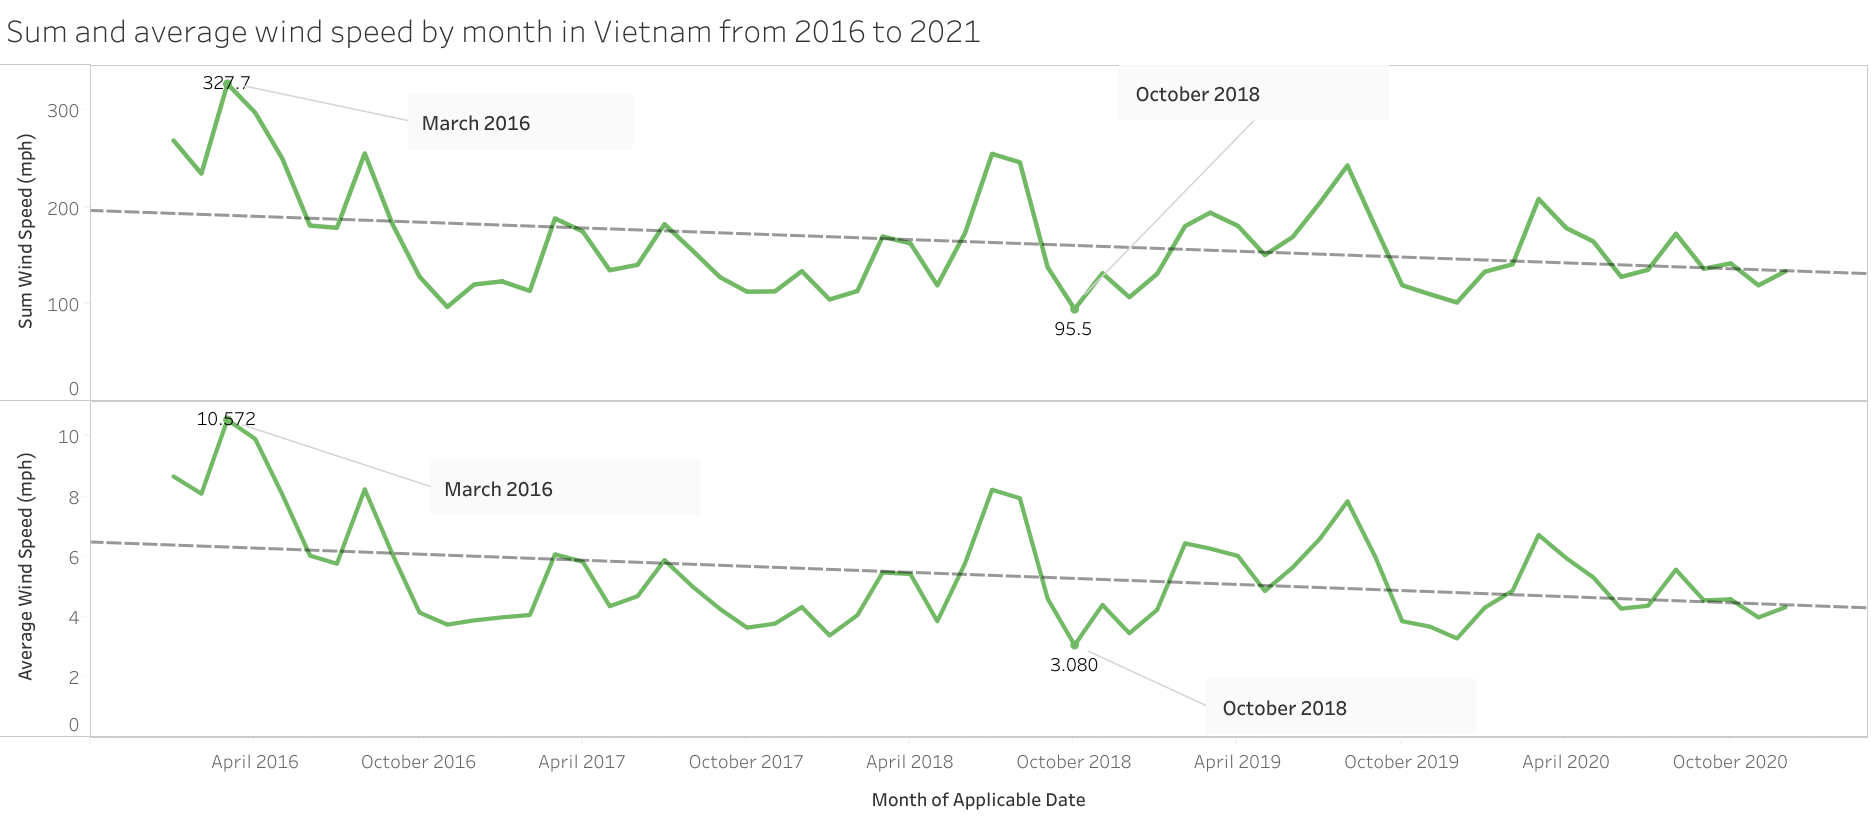

Biểu đồ trên cho thấy tổng tốc độ gió tích lũy trên tháng (phần trên của biểu đồ) và tốc độ gió trung bình trong trên tháng (phần dưới của biểu đồ) theo thời gian từ năm 2016 đến năm 2021.

Tổng tốc độ gió trong tháng:
* Xét về xu hướng, chúng ta thấy tổng tốc độ gió có xu hướng giảm từ 2016 đến 2021.
* Xét về quy luật, chúng ta không thấy được một quy luật rõ ràng nào.
* Tổng tốc độ gió cao nhất từ năm 2016 đến 2021 là 327.7 mph vào tháng 3 năm 2016.
* Tổng tốc độ gió thấp nhất từ năm 2016 đến 2021 là 95.5 mph vào tháng 10 năm 2018.

Tốc độ gió trung bình trong tháng:
* Xét về xu hướng, chúng ta thấy tốc độ gió trung bình có xu hướng giảm từ 2016 đến 2021.
* Xét về quy luật, chúng ta thấy nó có quy luật giống nhưng quy luật của đường tổng tốc độ gió theo tháng.
* Tốc độ gió trung bình cao nhất từ năm 2016 đến 2021 là 10.572 mph vào tháng 3 năm 2016.
* Tốc độ gió trung bình thấp nhất từ năm 2016 đến 2021 là 3.080 mph vào tháng 10 năm 2018.

## Nhiệt đồ thấp nhất trong ngày theo thơi gian

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1BL_gLJ5tTFDKyEfD7OnYpQn5AU6LBATv)

Biểu đồ trên cho thấy nhiệt độ thấp nhất trong ngày trung bình hàng tháng và Biểu đồ dưới cho thấy nhiệt độ thấp nhất đạt được hàng tháng theo thời gian từ năm 2016 đến năm 2021.

Nhiệt độ thấp nhất trong ngày trung bình hàng tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là dao động quanh 25.013 độ.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm.
* Nhiệt độ thấp nhất trong ngày trung bình hàng tháng dao động từ 27.794 đến 22.561 trong suốt từ năm 2016 đến 2021.

Nhiệt độ thấp nhất trong tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là ổn định.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm.
* Tổng lượng nhiệt thấp nhất từng đạt được là 19.473 độ vào tháng 1 năm 2016.

## Nhiệt đồ cao nhất trong ngày theo thơi gian

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1aws9AleAnGNKbVDYo1QGZCS0ZVV3S1X1)

Biểu đồ trên cho thấy nhiệt độ cao nhất trong ngày trung bình hàng tháng và Biểu đồ dưới cho thấy nhiệt độ cao nhất đạt được hàng tháng theo thời gian từ năm 2016 đến năm 2021.

Nhiệt độ cao nhất trong ngày trung bình hàng tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là dao động quanh 31.234 độ.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm.
* Nhiệt độ cao nhất trong ngày trung bình hàng tháng dao động từ 28.775 đến 36.471 trong suốt từ năm 2016 đến 2021.

Nhiệt độ cao nhất trong tháng:
* Xét về xu hướng, chung ta thấy gần như xu hướng chung là ổn định.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm.
* Tổng lượng nhiệt cao nhất từng đạt được là 38.035 độ vào tháng 4 năm 2019.

## Tần suất hướng gió và tốc độ gió trung bình 

![Temperature (1).png](https://drive.google.com/uc?export=view&id=11Mmp0S6TkRXT2oEc-huRvnbTij2wk7NG)

Biểu đồ trên cho thấy tần suất mỗi hướng gió từ năm 2016 đến năm 2021.

* Xét về xu hướng, chúng ta thấy gần như 2 xu hướng lớn là Đông Nam và Tây Tây Nam.
* Xét về quy luật, tần suất gió gần như đồng biến với tốc độ gió.
* Hướng gió có tần suất và tốc độ gió trung bình lớn nhất là Tây Tây Nam với tần suất 246 ngày và tốc độ gió là 6.651 m/s.


## Tần suất trung bình các trạng thái thời tiết hàng tháng 

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1_G0IAAZLOy-T78p3jJsADjwk9sQBqPFj)


Biểu đồ trên cho thấy tần suất trung bình các trạng thái thời tiết hàng tháng từ năm 2016 đến năm 2021.

* Xét về xu hướng, chúng ta thấy các loại hình thời tiết Clear, Light Cloud, Heavy Cloud, Shower có xu hướng giành ưu thế vào những tháng Đông-Xuân và ngược lại các loại hình thời tiết Light Rain, Heavy Rain, Thunder có xu hướng giành ưu thế vào những tháng Hè-Thu.
* Xét về quy luật, chúng lặp lại hàng năm.
* Tháng 2, loại hình thời tiết Clear, Light Cloud, Heavy Cloud, Shower giành ưu thế gần như tuyệt đối với Light Cloud với trung bình 15.8 ngày.
* Tháng 8, loại hình thời tiết Light Rain, Heavy Rain, Thunder giành ưu thế gần như tuyệt đối với Heavy Rain với trung bình 20.4 ngày.


## Tầm nhìn xa trung bình theo thời gian

![Temperature (1).png](https://drive.google.com/uc?export=view&id=14TKQKirA_--Ajn5EybwejY4qi9MGAB-a)

Biểu đồ trên cho thấy tầm nhìn xa trung bình theo thời gian hàng tháng từ năm 2016 đến năm 2021.

* Xét về xu hướng, chung ta thấy gần như xu hướng tăng nhẹ dần theo thời gian.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm, cao hơn thơi gian ĐÔng-Xuân và thấp hơn vào Hè-Thu.
* Tầm nhìn xa lớn nhất là 14.192km vào tháng 1 năm 2020 và thấp nhất là 7.306km vào tháng 8 năm 2019.


## Khả năng dự đoán thời tiết theo thời gian

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1Ya_sfBW3UbNjGH21d4cW3QsIMkVz0vbz)

Biểu đồ trên cho thấy khả năng dự đoán thời tiết theo thời gian từ năm 2016 đến năm 2021.

Nhiệt độ cao nhất trong ngày trung bình hàng tháng:
* Xét về xu hướng, chung ta thấy xu hướng gần như tăng vào năm 2016-2017, chững lại vào năm 2019-2020 và sẽ tăng trong tương lai.
* Xét về quy luật, ta thấy dường như chúng lặp lại hàng năm, cao hơn thơi gian Hè-Thu và thấp hơn vào Đông-Xuân.
* Khả năng dự đoán thời tiết cao nhất là 77.194% vào tháng 7 năm 2018 và thấp nhất là 69.931% vào tháng 2 năm 2016.


## Sự tương quan giữa khả năng dự đoán thời tiết và độ ẩm

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1832aOk67DOis9GZfsJmVAnnzLm3ykF9a)

Biểu đồ trên cho thấy sự tương quan giữa khả năng dự đoán thời tiết và độ ẩm hàng tháng từ năm 2016 đến năm 2021.

Sự tương quan thể hiện qua hồi quy tuyến tính theo đường thằng :
y = 0.217676*x + 58.1974  với p-value < 0.0001

* Đường thẳng thể hiện độ ẩm và khả năng dự đoán tỷ lệ thuận.


## Sự tương quan giữa khả năng dự đoán thời tiết và nhiệt độ

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1pS55gMYPUgrQWaB-DHb3SroZD3-u6x3F)

Biểu đồ trên cho thấy sự tương quan giữa khả năng dự đoán thời tiết và nhiệt độ hàng tháng từ năm 2016 đến năm 2021.

Sự tương quan thể hiện qua hồi quy tuyến tính theo đường thằng :
y = -0.81487*x + 98.6385 với p-value < 0.0001

* Đường thẳng thể hiện nhiệt độ và khả năng dự đoán tỷ lệ thuận.


## Sự tương quan giữa tầm nhìn xa và độ ẩm

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1NvlFdsi_zHTt5YR0Mv3dPy3vnUeWCDjP)

Biểu đồ trên cho thấy sự tương quan giữa tầm nhìn xa và độ ẩm hàng tháng từ năm 2016 đến năm 2021.

Sự tương quan thể hiện qua hồi quy tuyến tính theo đường thằng :
y = -0.128069*x + 19.4364 với p-value < 0.0001

* Đường thẳng thể hiện tầm nhìn xa và độ ẩm tỷ lệ nghịch.


## Sự tương quan giữa nhiệt độ và độ ẩm

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1Yr_WJTK9dHu7DutzjJbipEVv7asm6zDQ)

Biểu đồ trên cho thấy sự tương quan giữa nhiệt độ và độ ẩm hàng tháng từ năm 2016 đến năm 2021.

Sự tương quan thể hiện qua hồi quy tuyến tính theo đường thằng :
y = -0.149614*x + 41.0733 với p-value < 0.0001

* Đường thẳng thể hiện nhiệt độ và độ ẩm tỷ lệ nghịch.


## Sự tương quan giữa nhiệt độ và tôc độ gió

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1mt0MSRrk64K2x81FLsG8cDWPKqXCFy7q)

Biểu đồ trên cho thấy sự tương quan giữa nhiệt độ và tôc độ gió hàng tháng từ năm 2016 đến năm 2021.

Sự tương quan thể hiện qua hồi quy tuyến tính theo đường thằng :
y = 0.539553*x + 27.2716 với p-value < 0.0001

* Đường thẳng thể hiện nhiệt độ và tôc độ gió tỷ lệ thuận.


## Sự tương quan giữa trạng thái thời tiết với nhiệt độ và độ ẩm

![Temperature (1).png](https://drive.google.com/uc?export=view&id=1XJ_ZGxDz_iMV9F3y17EdV-dULFaUTvec)

Biểu đồ trên cho thấy sự tương quan giữa trạng thái thời tiết với nhiệt độ và độ ẩm từ năm 2016 đến năm 2021.

* Ta thấy các loại thời tiết theo thứ tự Clear, Light Cloud, Heavy Cloud, Showers, Light Rain, Heavy Rain, Thunder xu hướng là nhiệt độ giảm dần và tăng dần độ ẩm

# Kết luận

Thời tiết là một yếu tố quan trọng trong cuộc sống của chúng ta. Thông qua các phân tích, trực quan hóa bộ dữ liệu thì đã cho nhóm em cái nhìn rõ hơn về thời tiết, đồng thời qua đồ án cũng giúp nhóm em cải thiện việc phân tích cũng như trực quan hóa dữ liệu tốt hơn.

# Đề xuất

Từ bộ dữ liệu ta có thể xây dựng được một mô hình dự báo thời tiết vào những ngày trong tương lai từ những thuộc tính mà chúng ta đã phân tích (không chỉ ở mỗi Thành Phố Hồ Chí Minh, từ việc thu thập dữ liệu ở bất kỳ nơi nào thì chúng ta đều có thể phân tích được) -> Điều này sẽ giúp ích cho mọi người khi mà yếu tố thời tiết ảnh hưởng đến các công việc hàng ngày trong cuộc sống của chúng ta.

# Tài liệu tham khảo